In [16]:

from keras.datasets import fashion_mnist
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [17]:

# Task 1

x_train = None
y_train = None
x_test = None
y_test = None

def split_data():
    global x_train, y_train, x_test, y_test 
    ( x_train, y_train ), ( x_test, y_test ) = fashion_mnist.load_data()
    
# reshape dataset to have a single channel
def reshape_data():
    global x_train, x_test
    x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
    x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
    
split_data()
reshape_data()

In [18]:

def normalize_data():
    global x_train, x_test
    x_train = x_train.astype('float32') / 255
    x_test = x_test.astype('float32') / 255

def one_hot_encode_labels():
    global y_train, y_test
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)

def train_model(model, epochs=10, batch_size=64):
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))
    return history

def evaluate_model(model):
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {test_acc}")

def plot_performance(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()


In [19]:

def build_first_neural_network():
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28, 1)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def build_second_neural_network():
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28, 1)))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 0.5044 - accuracy: 0.8212 - val_loss: 0.4246 - val_accuracy: 0.8480
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3689 - accuracy: 0.8671 - val_loss: 0.3726 - val_accuracy: 0.8655
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3339 - accuracy: 0.8769 - val_loss: 0.3628 - val_accuracy: 0.8722
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3126 - accuracy: 0.8840 - val_loss: 0.3589 - val_accuracy: 0.8736
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2974 - accuracy: 0.8893 - val_loss: 0.3601 - val_accuracy: 0.8681
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2813 - accuracy: 0.8946 - val_loss: 0.3305 - val_accuracy: 0.8815
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2684 - accuracy: 0.8998 - val_loss: 0.3357 - val_accuracy: 0.8796
Epoch 

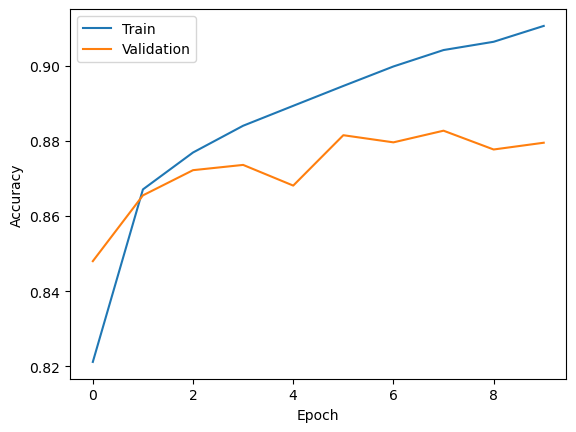

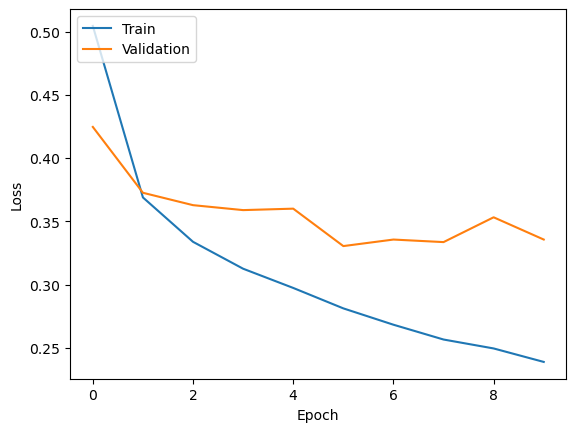

In [20]:

normalize_data()          
one_hot_encode_labels()   
first_neural_network = build_first_neural_network() 
history_of_first_neural_network = train_model(first_neural_network)  
evaluate_model(first_neural_network)  
plot_performance(history_of_first_neural_network)  

Epoch 1/10
938/938 [==============================] - 3s 2ms/step - loss: 0.5179 - accuracy: 0.8152 - val_loss: 0.4486 - val_accuracy: 0.8320
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3717 - accuracy: 0.8661 - val_loss: 0.3747 - val_accuracy: 0.8659
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3333 - accuracy: 0.8766 - val_loss: 0.3595 - val_accuracy: 0.8691
Epoch 4/10
938/938 [==============================] - 2s 3ms/step - loss: 0.3092 - accuracy: 0.8857 - val_loss: 0.3702 - val_accuracy: 0.8687
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2939 - accuracy: 0.8917 - val_loss: 0.3551 - val_accuracy: 0.8728
Epoch 6/10
938/938 [==============================] - 2s 3ms/step - loss: 0.2763 - accuracy: 0.8972 - val_loss: 0.3338 - val_accuracy: 0.8829
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2662 - accuracy: 0.9005 - val_loss: 0.3260 - val_accuracy: 0.8825
Epoch 

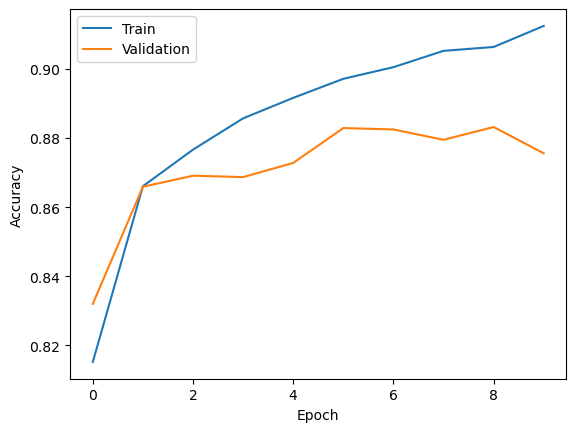

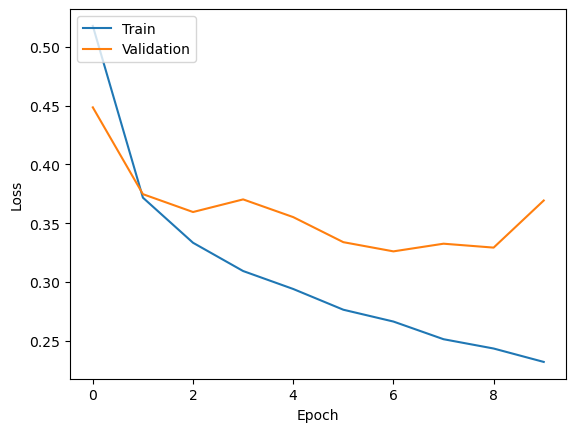

In [21]:

second_neural_network = build_second_neural_network()  
history_of_second_neural_network = train_model(second_neural_network)  
evaluate_model(second_neural_network)  
plot_performance(history_of_second_neural_network)  

In [22]:

#Task 2

def build_convolutional_neural_network(optimizer):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Epoch 1/10
938/938 [==============================] - 17s 18ms/step - loss: 0.5424 - accuracy: 0.8011 - val_loss: 0.3932 - val_accuracy: 0.8633
Epoch 2/10
938/938 [==============================] - 17s 18ms/step - loss: 0.3406 - accuracy: 0.8770 - val_loss: 0.3591 - val_accuracy: 0.8763
Epoch 3/10
938/938 [==============================] - 17s 18ms/step - loss: 0.2940 - accuracy: 0.8919 - val_loss: 0.3122 - val_accuracy: 0.8862
Epoch 4/10
938/938 [==============================] - 17s 18ms/step - loss: 0.2653 - accuracy: 0.9018 - val_loss: 0.2824 - val_accuracy: 0.8964
Epoch 5/10
938/938 [==============================] - 18s 19ms/step - loss: 0.2398 - accuracy: 0.9121 - val_loss: 0.2750 - val_accuracy: 0.8999
Epoch 6/10
938/938 [==============================] - 18s 19ms/step - loss: 0.2197 - accuracy: 0.9182 - val_loss: 0.2782 - val_accuracy: 0.8988
Epoch 7/10
938/938 [==============================] - 18s 19ms/step - loss: 0.2023 - accuracy: 0.9265 - val_loss: 0.2770 - val_accuracy:

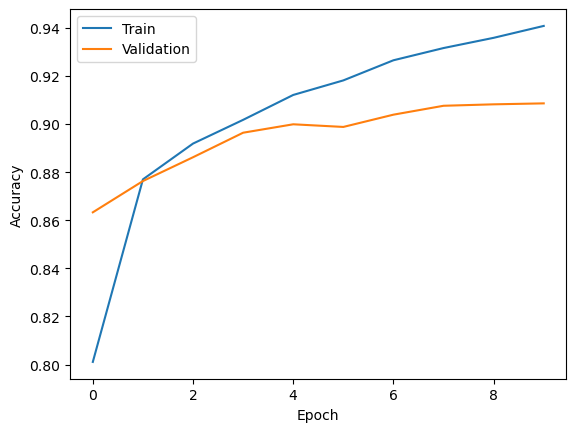

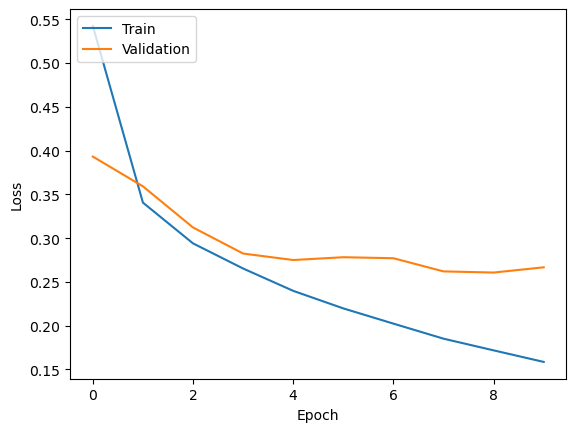

In [23]:

first_convolutional_neural_network = build_convolutional_neural_network('adam')
history_of_first_convolutional_network = train_model(first_convolutional_neural_network, epochs=10, batch_size=64)
evaluate_model(first_convolutional_neural_network)
plot_performance(history_of_first_convolutional_network)

Epoch 1/10
938/938 [==============================] - 18s 19ms/step - loss: 1.3178 - accuracy: 0.5354 - val_loss: 0.7923 - val_accuracy: 0.7080
Epoch 2/10
938/938 [==============================] - 17s 19ms/step - loss: 0.6854 - accuracy: 0.7433 - val_loss: 0.6792 - val_accuracy: 0.7436
Epoch 3/10
938/938 [==============================] - 17s 19ms/step - loss: 0.5858 - accuracy: 0.7797 - val_loss: 0.5955 - val_accuracy: 0.7715
Epoch 4/10
938/938 [==============================] - 17s 19ms/step - loss: 0.5281 - accuracy: 0.8036 - val_loss: 0.5182 - val_accuracy: 0.8099
Epoch 5/10
938/938 [==============================] - 17s 18ms/step - loss: 0.4868 - accuracy: 0.8199 - val_loss: 0.5187 - val_accuracy: 0.8070
Epoch 6/10
938/938 [==============================] - 17s 18ms/step - loss: 0.4571 - accuracy: 0.8334 - val_loss: 0.4902 - val_accuracy: 0.8205
Epoch 7/10
938/938 [==============================] - 17s 18ms/step - loss: 0.4359 - accuracy: 0.8434 - val_loss: 0.4633 - val_accuracy:

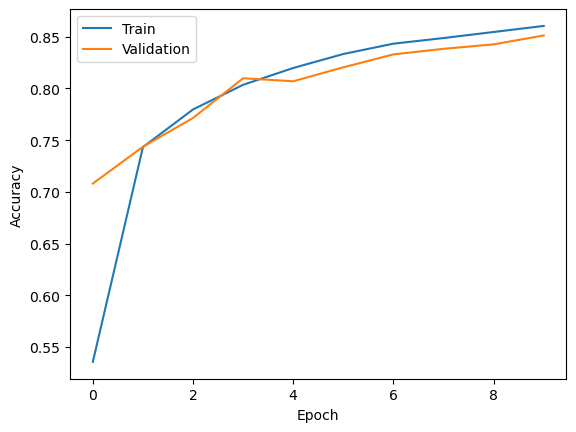

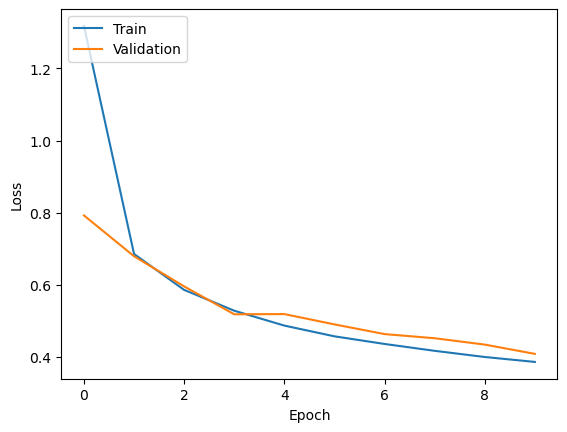

In [24]:

# Task 3

second_convolutional_neural_network = build_convolutional_neural_network('SGD')
history_of_second_convolutional_neural_network = train_model(second_convolutional_neural_network, epochs=10, batch_size=64)
evaluate_model(second_convolutional_neural_network)
plot_performance(history_of_second_convolutional_neural_network)